In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randn
%matplotlib inline

In [39]:
kcdata = pd.read_csv('kc_house_data.csv')

In [40]:
kcdata.head(2)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  

[2 rows x 21 columns]

In [41]:
kcdata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

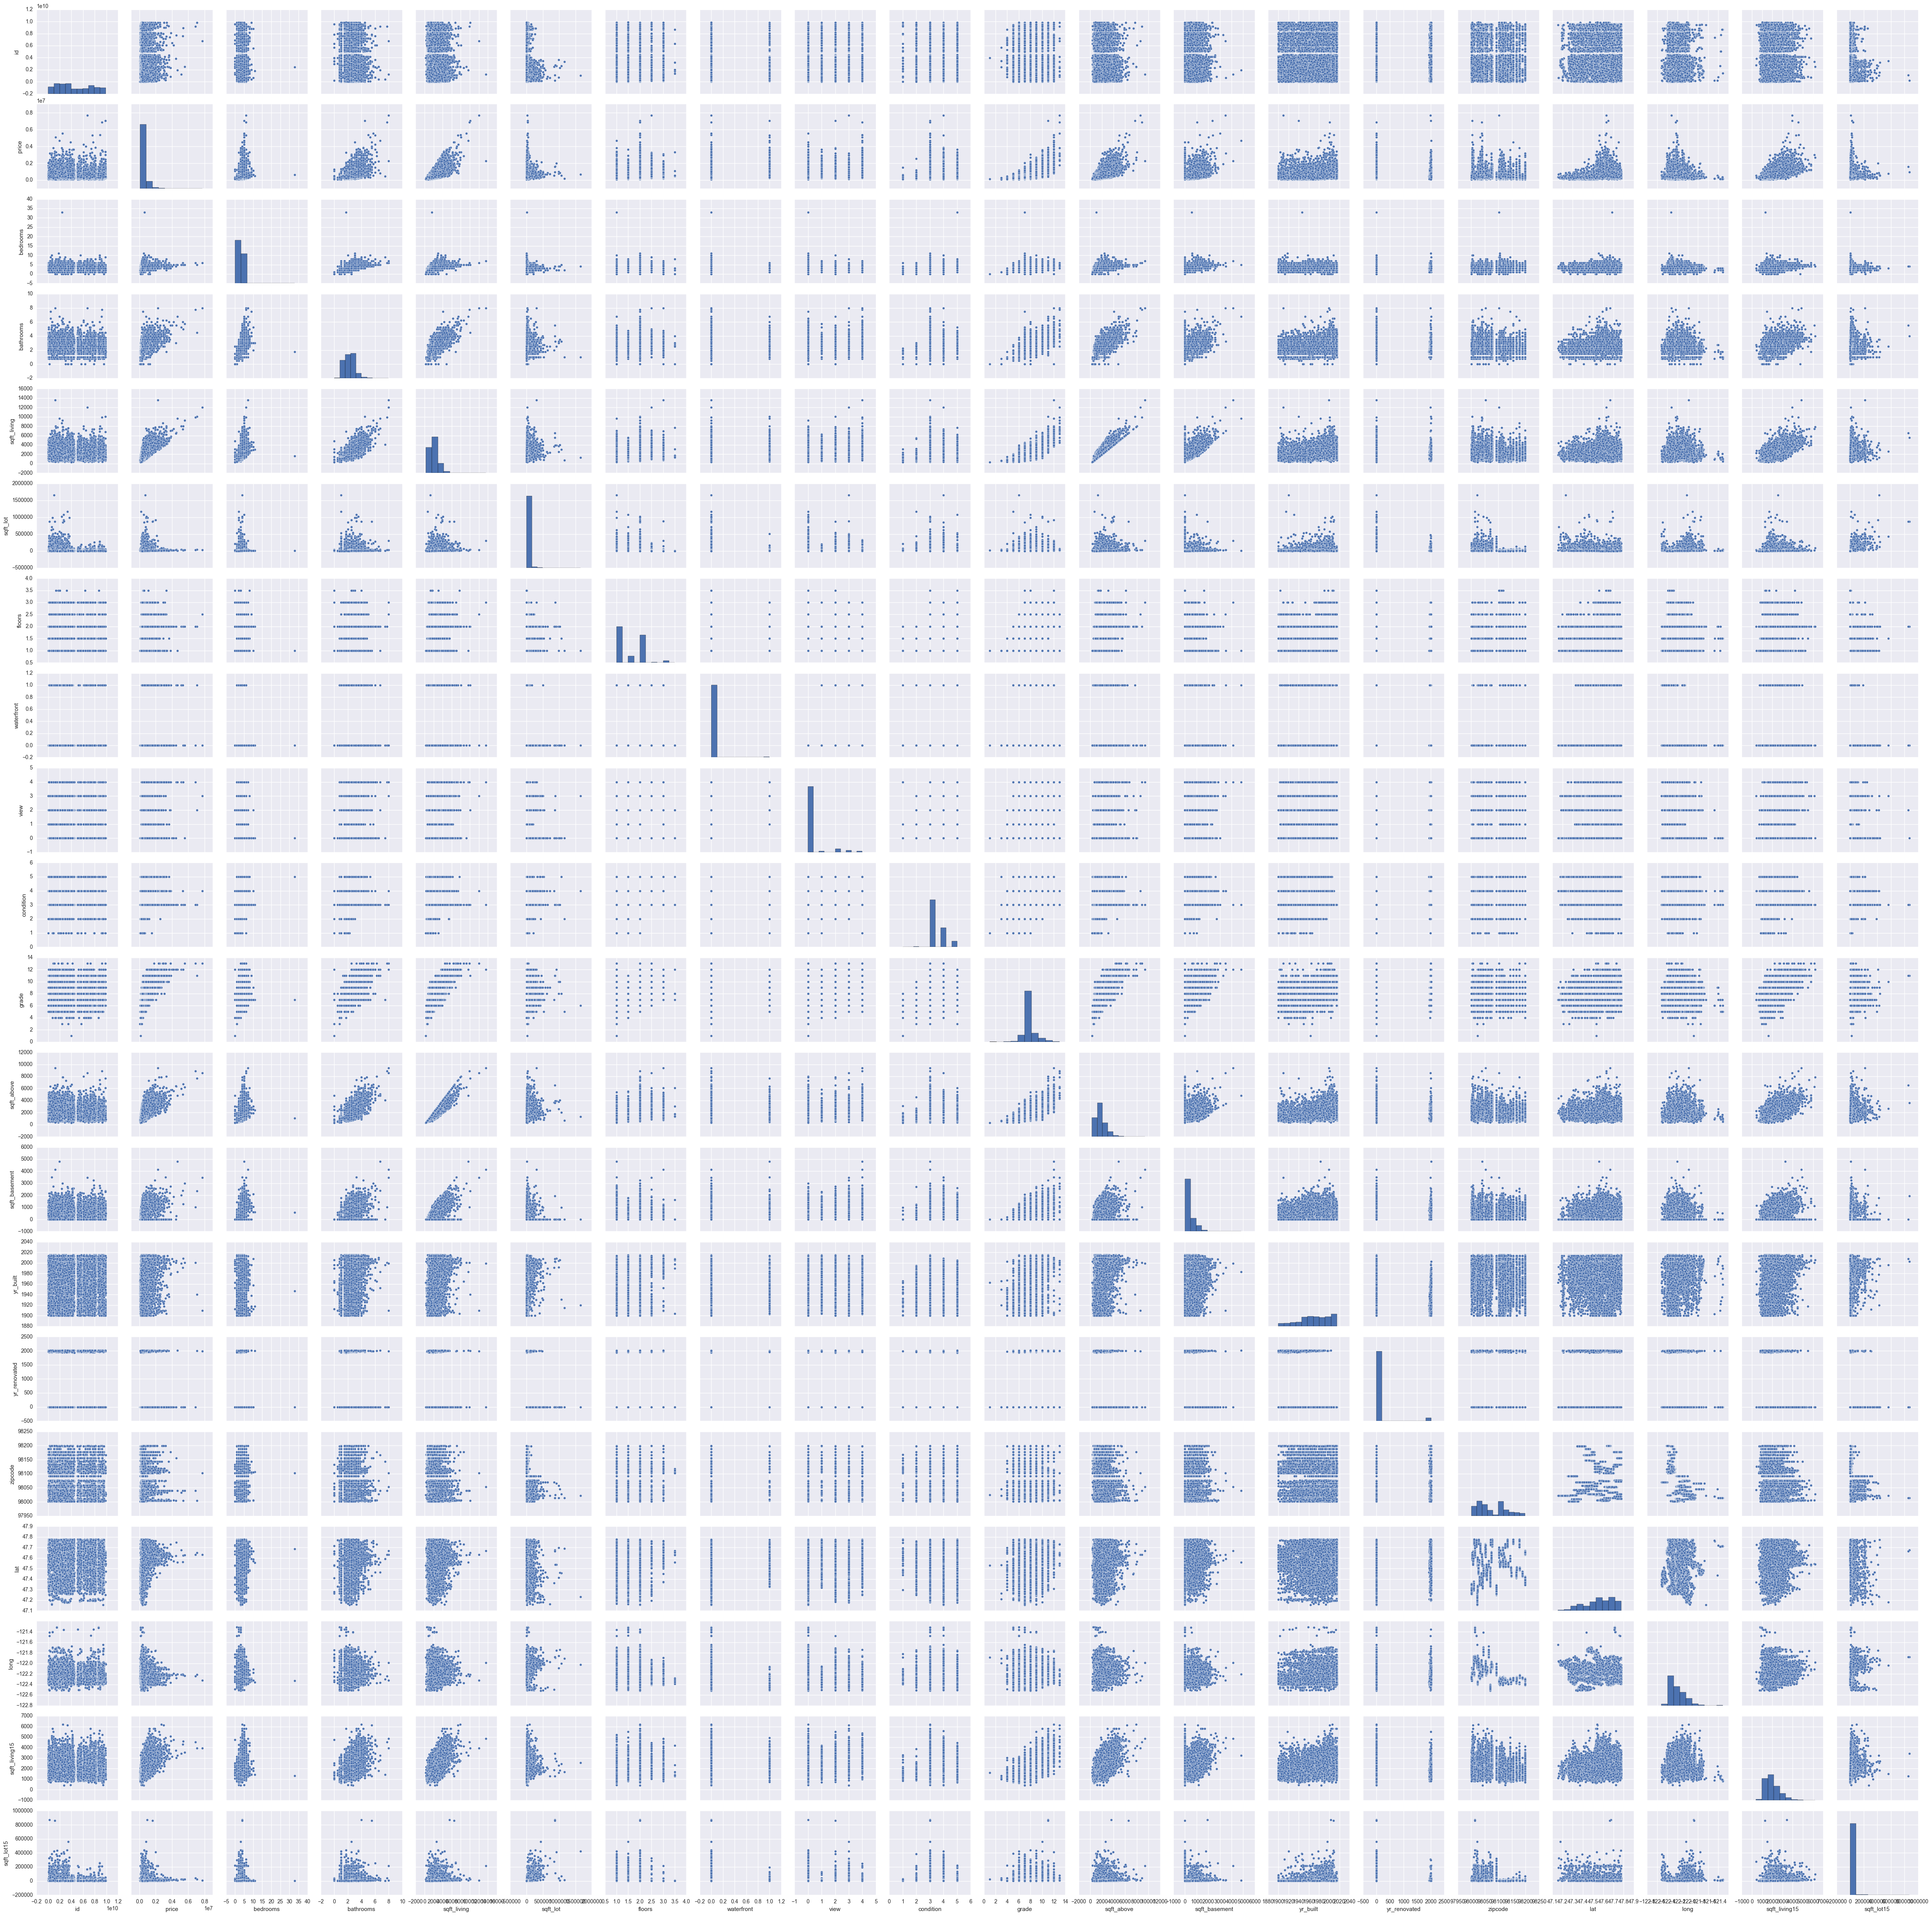

In [42]:
sns.pairplot(kcdata)

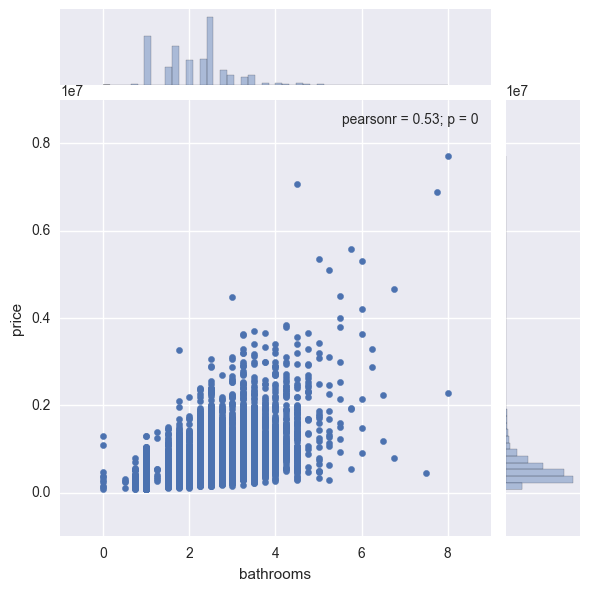

In [83]:
sns.jointplot(data=kcdata,x='bathrooms',y='price')

In [45]:
#length of membership
kcdata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [94]:
X=kcdata[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=kcdata['price']

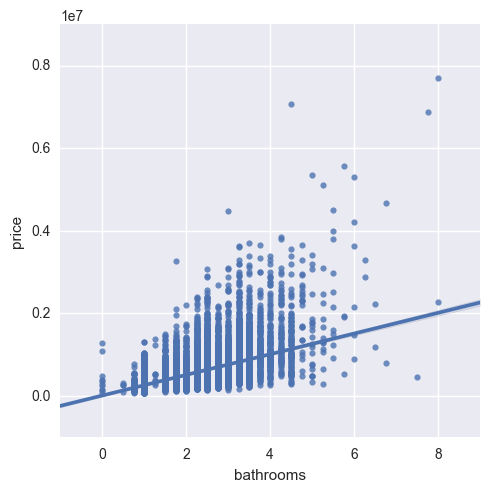

In [95]:
sns.lmplot(x='bathrooms',y='price',data=kcdata)

In [53]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [86]:
X_train.head(3)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
15198         4       2.75         2100     88426     1.0           0     0   
1979          3       1.75         1260      6223     1.0           0     0   
8059          4       2.25         2590     12600     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
15198          3      6        2100              0      1990             0   
1979           3      7         820            440      1983             0   
8059           3      9        2590              0      1979             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
15198    98038  47.3990 -122.011           2150       63162  
1979     98042  47.3574 -122.158           1260        6553  
8059     98006  47.5566 -122.162           2620       11050

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lm = LinearRegression()

In [99]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ -3.66796055e+04   4.56722377e+04   1.08943439e+02   1.31336780e-01
   5.90991829e+03   5.61826557e+05   5.72683095e+04   2.82887598e+04
   9.45726068e+04   7.36806877e+01   3.52627520e+01  -2.66406463e+03
   1.37204207e+01  -5.55650236e+02   5.90935193e+05  -2.24812220e+05
   2.26083475e+01  -3.54817115e-01]


In [101]:
predictions=lm.predict(X_test)
predictions

array([ 373059.60074618,  455159.98942714,  311248.10751799, ...,
         94929.92721116,  267538.90042625,  658017.91413344])

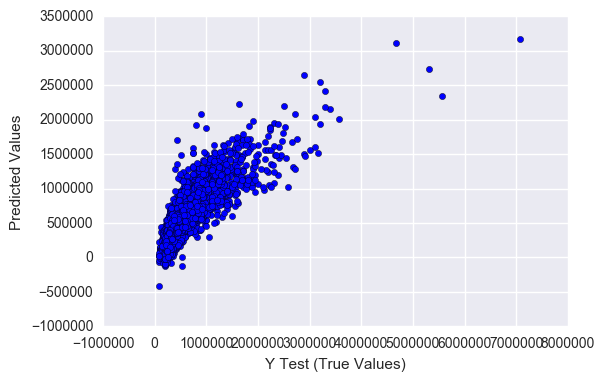

In [102]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

In [103]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 125515.690158
MSE 40241791275.5
RMSE 200603.567455


C:\Users\IKI PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


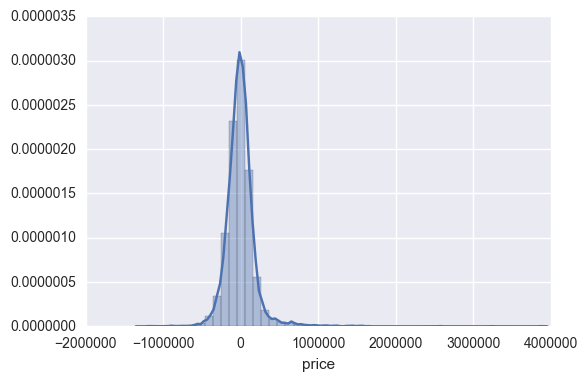

In [104]:
sns.distplot((y_test-predictions),bins=50)

In [132]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf.sort_index(ascending=True)

Coeff
bathrooms       45672.237710
bedrooms       -36679.605508
condition       28288.759794
floors           5909.918291
grade           94572.606770
lat            590935.193409
long          -224812.219949
sqft_above         73.680688
sqft_basement      35.262752
sqft_living       108.943439
sqft_living15      22.608347
sqft_lot            0.131337
sqft_lot15         -0.354817
view            57268.309540
waterfront     561826.556859
yr_built        -2664.064631
yr_renovated       13.720421
zipcode          -555.650236

In [107]:
lm.score(X_test,y_test)

0.69935293640062235

In [113]:
lm.intercept_

3475977.6893722937

In [114]:
lm.coef_

array([ -3.66796055e+04,   4.56722377e+04,   1.08943439e+02,
         1.31336780e-01,   5.90991829e+03,   5.61826557e+05,
         5.72683095e+04,   2.82887598e+04,   9.45726068e+04,
         7.36806877e+01,   3.52627520e+01,  -2.66406463e+03,
         1.37204207e+01,  -5.55650236e+02,   5.90935193e+05,
        -2.24812220e+05,   2.26083475e+01,  -3.54817115e-01])

In [115]:
kcdata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [118]:
feature_cols=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']